# 10. 딥러닝 레이어의 이해(1) Linear, Convolution

### 학습 내용
2. 데이터의 형태
  + 딥러닝을 적용하기 이전에 우리가 처리해야 할 데이터가 어떻게 생겼는지에 대해 알아봅니다.
3. 레이어는 어렵다?
  + 딥러닝에서 사용하는 레이어(layer)에 대한 정의에 대해 공부합니다.
4. 딥러닝의 근본! Linear 레이어
  + 딥러닝에서 가장 기초적인 레이어인 Linear 레이어에 대해 탐구합니다.
5. 정보를 집약시키자! Convolution 레이어
  + 이미지에서 정보를 집약시킬 때 사용하는 Convolution 레이어에 대해 살펴봅니다.
6. 핵심만 추려서 더 넓게! Pooling 레이어
  + Convolution 레이어 다음에 작동하는 Pooling 레이어를 알아봅니다.
7. 집약된 정보의 복원! Deconvolution 레이어
  + 집약된 정보를 복원해 생성할 때 사용하는 Deconvolution 레이어에 대해 알아봅니다.

### 학습 목표
* 레이어의 개념을 이해합니다.
* 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해합니다.
* 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배웁니다.


## 10-2. 데이터의 형태

이미지의 경우 3차원 데이터로 표현되며 Channel, Width, Height로 이루어 진다.

------------------
**Q_10.2 해상도가 1280 x 1024(30fps)이고 러닝타임(T)이 90분인 흑백 영화 데이터는 어떻게 표현할 수 있을까요? 표기는 (T, C, H, W)를 따라주세요.**   
(162000, 1, 1024, 1280)

Time: 90분 x 60초 x 30fps Channel: 흑백 영화는 단일 채널로 이루어진다. Height: 1024 Width: 1280

--------------------



## 10-3. 레이어는 어렵다?

> 여러 개의 논리적인 개체가 층을 이루어서 하나의 물체를 구성하는 경우, 이러한 각각의 객체를 하나의 레이어라 한다.   

## 10-4. 딥러닝의 근본! Linear 레이어

**Linear Layer**중에서도 많은 종류들이 있다. 이들은 모두 선형 변환을 하는 레이어이다.




In [ ]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)
print("1단계 Linear Layer의 파라미터개수:", first_linear.count_params())
print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)
print("2단계 Linear Layer의 파라미터개수:", second_linear.count_params())

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)
1단계 Linear Layer의 파라미터개수: 2

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)
2단계 Linear Layer의 파라미터개수: 4


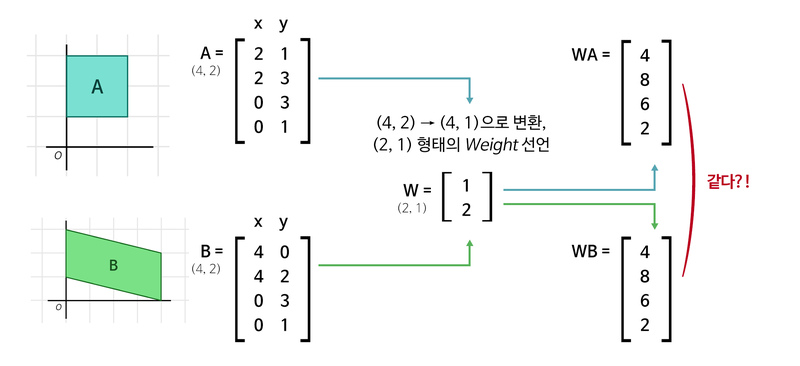

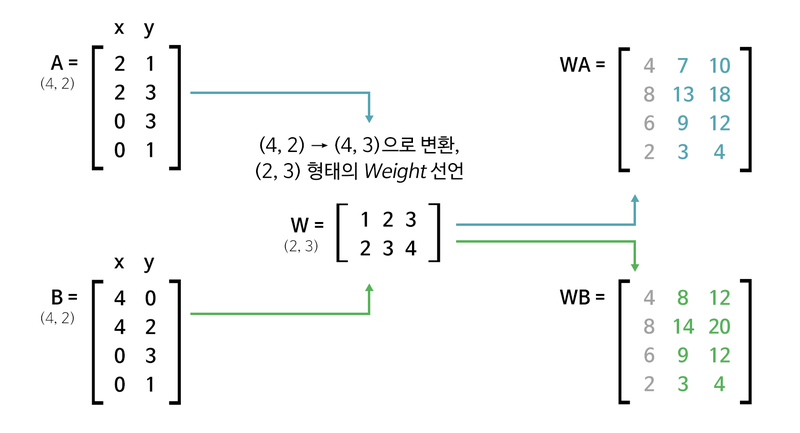

<식2>   
1단계: (4, 2) * (2, 3) = (4, 3)   
2단계: (4, 3) * (3, 1) = (4, )   
3단계: (4, )  * (4, 1) = (1, )  

In [ ]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

########
# Step 1: (4,2)차원인 boxes를 (4,3)으로 확장시키는 Linear Layer를 활용하세요.
first_linear = tf.keras.layers.Dense(units=3, use_bias=False) 
first_out = first_linear(boxes)

########

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

########
# Step 2:  4차원인 second_out을 하나의 실수으로 집약시키는 Linear Layer를 활용하세요. (2단계를 참고해주세요)
third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

########

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

########
# Step 3: 모든 params를 더하여 total_parmams를 구하세요.
total_params = first_linear.count_params()+second_linear.count_params()+third_linear.count_params()

########

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


지나치게 많은 Parameter는 과적합(Overfitting) 을 야기한다.

Weight의 형태만 선언해 주면 파라미터 값을 임의의 실수가 채우고, 훈련과정을 통해 가장 적합한 Weight을 찾아간다.

**편향(Bias)**은 즉 평균이 다른 것이고, $y=Wx+b$에서 $b$입니다.

## 10-5. 정보를 집약시키자! Convolution 레이어

> <식3>
1단계: (1920, 1080, 3) → (1, 1920 x 1080 x 3)   
2단계: (1, 6220800) ⋅ (6220800, ) = (1, )   



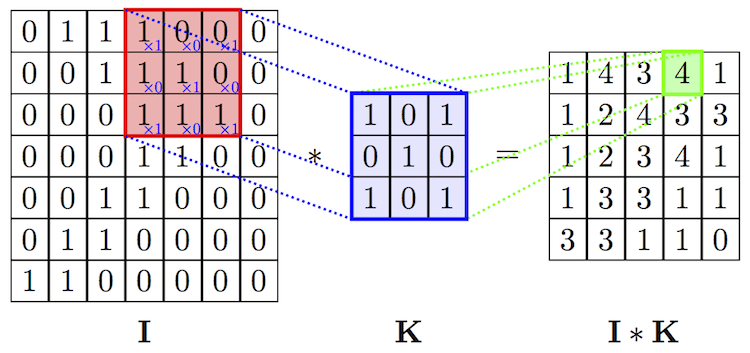

**필터(kernel)**로 다양한 결과를 얻을 수 있다. 또한 커널이 이동하는 개수를 **Stride**라고 한다. 출력의 형태를 결정할 수 있는 **Padding**이 있다.

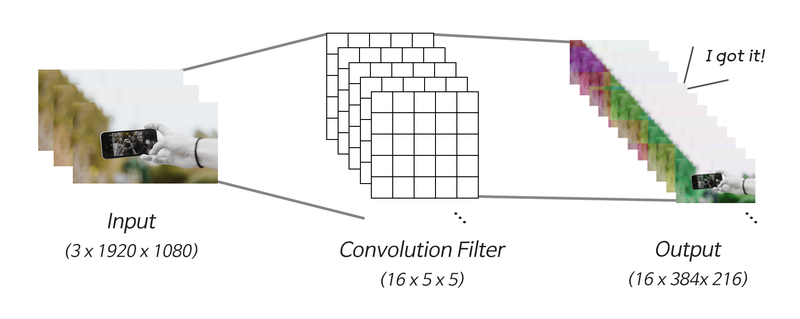

> <식 4> (∗ 기호는 Convolution 연산을 뜻합니다)  
1단계: (1920, 1080, 3) ∗ (3, 16, 5, 5) Stride5 = (384, 216, 16)  
2단계: (384, 216, 16) → (1, 384 x 216 x 16)  
3단계: (1, 1327104) ⋅ (1327104, ) = (1, )

<식 4>는 16개의 5 x 5 필터를 가진 Convolution 레이어를 정의 하여 이미지를 Stride 5 로 훑었고, 그렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약 하였습니다. 필터들은 입력의 3채널에 각각 적용되므로 Convolution 레이어의 파라미터는 3 x 16 x 5 x 5 = 1200개 입니다.

-------------
**Q_10.4 하지만 그럼에도 <식 4>를 따라 정의한 신경망은 손을 찾는 데에 적합하지 않을 수도 있습니다. 이유가 무엇일까요? (힌트는 필터에 있습니다!)**   
1920 x 1080 인 입력 데이터 크기에 비해 5 x 5는 손이라는 객체를 판별해 낼 수 있을 만큼 유의미한 정보를 담기에는 작은 필터 사이즈일 가능성이 높다.
입력의 크기를 줄이거나 필터 크기를 키울 필요가 있다.

필터의 크기와 Stride를 같게 하면 손이 필터의 경계선에 걸리는 경우, 정상적으로 인식하지 못할 수 있다. Stride를 줄여 이미지를 더 자세하게 살피도록 설계하자.

-----------

In [ ]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


## 10-6. 핵심만 추려서 더 넓게! Pooling 레이어

**수용영역(Receptive Field) 개념**

**Max Pooling 레이어**

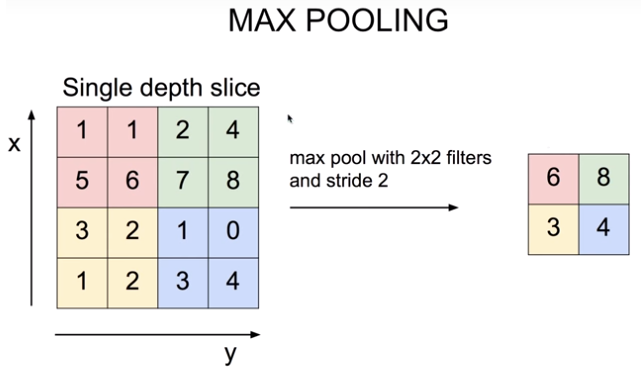

------------
**Q_10.6 필터 크기가 3 X 3이고 stride가 2인 convolution 레이어에 2 X 2 max pooling 레이어가 연결된 딥러닝 모델이 있습니다. 위 그림과 같은 max pooling 레이어를 통해 빨간색 포인트가 선택되었다면 max pooling 레이어의 output에서의 receptive field의 크기는 얼마일까요?**   
위 그림에서는 빨간색, 녹색, 파란색, 하얀색 포인트가 가지는 Receptive Field의 영역 전체가 max pooling 레이어의 한 포인트의 Receptive Field가 되므로 이때는 5 X 5의 Receptive Field를 가지게 된다.

----------

**Max Pooling 레이어의 의미**

* translational invariance 효과
  + object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다
* Non-linear 함수와 동일한 피처 추출 효과
  + 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진
* Receptive Field 극대화 효과
  + Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 합니다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 합니다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Max Pooling 레이어 사용입니다. 다른 하나로는 Dilated Convolution이 있습니다.

## 10-7. 집약된 정보의 복원! Transpose Convolution 레이어

**Auto Encoder**

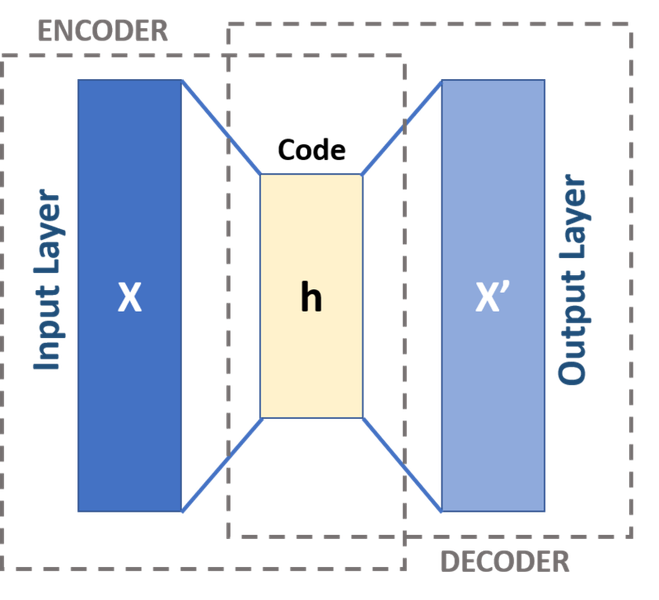

In [3]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                              

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 96s 403ms/step - loss: 0.6937 - val_loss: 0.6934
Epoch 2/2
235/235 [==============================] - 89s 379ms/step - loss: 0.6929 - val_loss: 0.6925


In [2]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

NameError: ignored

In [6]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
# Conv2D layer와 Maxpooling2D 레이어를 활용해서 Encoder layer를 정의해주세요.
# Conv2D layer는 filter를 16부터 2까지 2를 나누어서 총 4개로 구성하되 3*3 커널을 적용해서 만들어주세요.
# MaxPooling2D의 경우에도 pooling size를 2*2로 적용해주세요
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_4 = Conv2D(2, (3, 3), activation='relu', padding='same')
encode_pool_layer_4 = MaxPooling2D((2, 2), padding='same')


encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)
encoded = encode_conv_layer_4(encoded)
encoded = encode_pool_layer_4(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
# Decoder 파트에서 Conv2DTranspose 레이어를 활용하되 filter를 2부터 16까지 
# 늘리되 마지막은 filter는 1로 두고 3*3 커널을 적용해서 만들어주세요.
# UpSampling2D의 경우에도 size를 2*2로 적용해주세요.
# Decoder 파트에서 가장 중요한 것은 output layer가 28*28로 나와야 합니다. 
# (힌트 : padding을 전부 넣지않는 것이 중요합니다)
 
decode_conv_layer_1 = Conv2D(2, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_4 = UpSampling2D((2, 2))
decode_conv_layer_5 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')


decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)
decoded = decode_upsample_layer_4(decoded)
decoded = decode_conv_layer_5(decoded)

# AutoEncoder 모델 정의하고 optimizer를 'adam'으로 놓고 컴파일해주세요. 그리고 모델 학습을 진행해주세요.
autoencoder = Model(input_img, decoded)
# autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 4)           292 